# Parte I

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from prettytable import PrettyTable, NONE
from sklearn.metrics import *

C:\Users\Noah\AppData\Local\Temp\ipykernel_6236\2107948719.py:4: DeprecationWarning: the 'NONE' constant is deprecated, use the 'HRuleStyle' and 'VRuleStyle' enums instead
  from prettytable import PrettyTable, NONE


In [2]:
np.random.seed(3)

In [3]:
dataset = np.fromfile("./data/dataAll.txt", dtype=np.float64)

In [4]:
print(dataset.shape)
print(dataset)

(3000,)
[-363.7884  244.1423    0.     ... -140.147   734.0983    0.    ]


O dataset encontra-se atualmente em um array unidimensional com 3000 elementos, organizados sequencialmente em grupos de 3. Isso indica a necessidade de reestruturar o array para uma forma matricial com 3 colunas, de modo a viabilizar uma manipulação mais eficiente e semântica dos dados.

## Redimensionando o dataset

A função reshape é utilizada para modificar a estrutura de um array sem alterar seus dados. Na forma em que está sendo aplicada, o valor 3 especifica o novo número de colunas, enquanto o parâmetro -1 instrui o NumPy a calcular automaticamente a quantidade de linhas necessária com base no total de elementos disponíveis.

In [5]:
dataset = dataset.reshape(-1,3)

In [6]:
dataset.shape
print(dataset)

[[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 ...
 [ 872.4311  669.1192    1.    ]
 [ 822.6894 -702.6489    1.    ]
 [-140.147   734.0983    0.    ]]


# Adicionando o viés ($x_0 = -1$)

Criando um array coluna que possui os valores de -1 no neuronio perceptron 

In [7]:
vies = -1 * np.ones((dataset.shape[0], 1))
print(vies.shape)
print(type(vies))

(1000, 1)
<class 'numpy.ndarray'>


O array coluna é incorporado ao dataset por meio da função np.hstack, a qual realiza a concatenação horizontal de arrays, unindo a nova coluna à matriz existente ao longo do eixo das colunas.

In [8]:
valores = np.hstack((vies, dataset))

print(valores)

[[  -1.     -363.7884  244.1423    0.    ]
 [  -1.      328.7572 -256.7658    1.    ]
 [  -1.     -164.9827  613.2164    0.    ]
 ...
 [  -1.      872.4311  669.1192    1.    ]
 [  -1.      822.6894 -702.6489    1.    ]
 [  -1.     -140.147   734.0983    0.    ]]


Com o ajuste dos dados, preocupa-se agora com a criação de uma classe perceptron capaz de tratar esses dados 

## Modelando o Perceptron

O Perceptron é um modelo de rede neural simples que é usado para classificação binária. Foi proposto por Frank Rosenblatt em 1958 e é um dos primeiros algoritmos de redes neurais. Neste notebook representaremos ele através dessa classe.

## Regra Delta

A Regra Delta é um algoritmo de aprendizado supervisionado usado para ajustar os pesos de um neurônio artificial (como o Perceptron) durante o treinamento.

Ela se baseia na ideia de minimizar o erro entre a saída desejada e a saída do neurônio, ajustando os pesos com base nesse erro.

In [9]:
class Perceptron:
    """
    Implementação do Perceptron de Rosenblatt.
    """

    def __init__(self, intervalo, ativacao, tamanho_input):
        """
        Inicializa os pesos do perceptron com valores aleatórios dentro de um intervalo.

        Parâmetros:
        ----------
        intervalo : tuple
            Intervalo (min, max) para inicialização dos pesos.
        ativacao : function
            Função de ativação a ser aplicada (ex: degrau).
        tamanho_input : int
            Número de entradas do perceptron (incluindo bias).
        """
        self.intervalo = intervalo
        self.ativacao = ativacao
        self.pesos = np.random.uniform(self.intervalo[0], self.intervalo[1], size=tamanho_input)
        self.ajustes = 0

    def __str__(self):
        """
        Retorna uma representação textual do perceptron, incluindo número de ajustes e pesos atuais.
        """
        cabecalho = "Perceptron de Rosenblatt\n"
        numero_ajustes = f"Número de ajustes: {self.ajustes}\n"
        pesos = f"Pesos: w0 = {self.pesos[0]}; w1 = {self.pesos[1]}; w2 = {self.pesos[2]}\n"
        return (cabecalho + numero_ajustes + pesos)

    def get_pesos(self):
        """
        Retorna os pesos atuais do perceptron.
        
        Retorna:
        -------
        np.ndarray
            Vetor de pesos.
        """
        return self.pesos
    
    def get_ajustes(self):
        """
        Retorna o número total de ajustes realizados durante o treinamento.
        
        Retorna:
        -------
        int
            Quantidade de ajustes realizados.
        """
        return self.ajustes
    
    def ajuste_pesos(self, novos_pesos):
        """
        Atualiza os pesos do perceptron com novos valores e incrementa o contador de ajustes.

        Parâmetros:
        ----------
        novos_pesos : np.ndarray
            Vetor com os novos pesos.
        """
        self.pesos = novos_pesos
        self.ajustes += 1
    
    def forward(self, X):
        """
        Executa a propagação no perceptron.

        Parâmetros:
        ----------
        X : np.ndarray
            Vetor de entrada.

        Retorna:
        -------
        float
            Saída após aplicação da função de ativação.
        """
        u = np.dot(X, self.pesos)
        y = self.ativacao(u)
        return y
        
    def regra_delta(self, x_n, erro, eta=0.1):
        """
        Aplica a Regra Delta para calcular novos pesos com base no erro da amostra.

        Parâmetros:
        ----------
        x_n : np.ndarray
            Vetor de entrada da amostra.
        erro : float
            Erro entre saída esperada e saída predita.
        eta : float
            Taxa de aprendizado (padrão = 0.1).

        Retorna:
        -------
        np.ndarray
            Novo vetor de pesos ajustado.
        """
        novos_pesos = self.pesos + eta * erro * x_n
        return novos_pesos
    
    def fit(self, valores, eta=0.1):
        """
        Treina o perceptron usando a Regra Delta até a convergência.

        Parâmetros:
        ----------
        valores : np.ndarray
            Array de amostras, onde cada amostra deve conter [x0, x1, x2, y_d].
        eta : float
            Taxa de aprendizado (padrão = 0.1).

        Retorna:
        -------
        tuple
            (número de ajustes realizados, número de épocas até a parada)
        """
        epocas = 0
        aprender = True

        while aprender:
            epocas += 1
            aprender = False
            for val in valores:
                x_n = val[:3]
                y_chapeu = self.forward(x_n)
                y_d = val[3]
                e = y_d - y_chapeu
                if int(e) != 0:
                    aprender = True
                    novos_pesos = self.regra_delta(x_n, e, eta)
                    self.ajuste_pesos(novos_pesos)
        
        return (self.get_ajustes(), epocas)
        
    def fit(self, valores, eta=0.1, max_epocas=100):
        """
        Treina o perceptron usando a Regra Delta até a convergência ou até atingir o número máximo de épocas.

        Parâmetros:
        ----------
        valores : list of np.ndarray
            Array de amostras, onde cada amostra deve conter [x0, x1, x2, y_d].
        eta : float
            Taxa de aprendizado (padrão = 0.1).
        max_epocas : int
            Número máximo de épocas permitidas para o treinamento.

        Retorna:
        -------
        tuple
            (número de ajustes realizados, número de épocas até a parada)
        """
        epocas = 0
        aprender = True
    
        while aprender and epocas < max_epocas:
            epocas += 1
            aprender = False
            for val in valores:
                x_n = val[:3]
                y_chapeu = self.forward(x_n)
                y_d = val[3]
                e = y_d - y_chapeu
                if int(e) != 0:
                    aprender = True
                    novos_pesos = self.regra_delta(x_n, e, eta)
                    self.ajuste_pesos(novos_pesos)
                    
            np.random.shuffle(valores)
        
        return (self.get_ajustes(), epocas)

## Função de Ativação

A função de ativação solicitada é a função degrau, a qual é representada pela seguinte expressão:

In [10]:
def degrau(x, tetha=0):
    if x-tetha < 0:
        return 0
    return 1

## Inicialização

Instanciando o perceptron com os valores solicitados.

In [11]:
tamanho_input = valores.shape[1] - 1 
neuronio = Perceptron((-0.5, 0.5), degrau, tamanho_input)

In [12]:
print(neuronio)

Perceptron de Rosenblatt
Número de ajustes: 0
Pesos: w0 = 0.050797902574575504; w1 = 0.20814782261810483; w2 = -0.20909526108705567



## Treinamento

In [13]:
ajustes, epocas = neuronio.fit(valores, eta=0.1)

In [14]:
print(f"O treinamento terminou em {epocas} épocas e com {ajustes} ajustes nos pesos")

O treinamento terminou em 14 épocas e com 256 ajustes nos pesos


In [15]:
print(neuronio)

Perceptron de Rosenblatt
Número de ajustes: 256
Pesos: w0 = -2.3492020974254255; w1 = 710.9708678226182; w2 = -711.889355261087



In [16]:
w0, w1, w2 = neuronio.get_pesos()

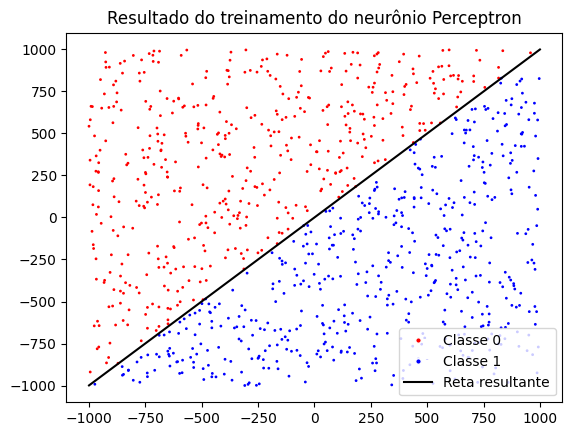

In [17]:
cores = np.where(dataset[:, 2] == 0, 'red', 'blue')

plt.scatter(dataset[:, 0], dataset[:, 1], c=cores, s=1)

x = np.linspace(-1000, 1000, 100)
y = w0/w2 - x * w1/w2
plt.plot(x, y, c='k')

legenda = [
       Line2D([0], [0], marker='o', color='w', label='Classe 0',
           markerfacecolor='red', markersize=4),
       Line2D([0], [0], marker='o', color='w', label='Classe 1',
           markerfacecolor='blue', markersize=4),
       Line2D([], [], color='k', linestyle='-', label='Reta resultante')
]
plt.legend(handles=legenda)
plt.title("Resultado do treinamento do neurônio Perceptron")
plt.show()

# Parte II

In [18]:
dataset2 = np.fromfile("./data/data0.txt", dtype=np.float64)

In [19]:
dataset2 = dataset2.reshape(-1,3)

In [20]:
dataset2.shape

(600, 3)

### Adicionando o viés ($x_0 = -1$)

In [21]:
vies = -1 * np.ones((dataset2.shape[0], 1))

In [22]:
valores2 = np.hstack((vies, dataset2))

## Teste de diferentes confugurações de $\eta$ e $I$

In [23]:
def grid_search(etas, intervalos):
    g1, g2 = np.meshgrid(etas, intervalos[:,0])
    _, g3 = np.meshgrid(etas, intervalos[:,1])
    grid = np.hstack([g1.reshape(-1, 1), g2.reshape(-1, 1), g3.reshape(-1, 1)]) # Resulta no produto carteziano etas X intervalos [[eta, -lim, +lim], ...]

    tabela = PrettyTable()
    tabela.vrules = NONE
    tabela.title = 'Configurações'
    tabela.field_names = ["Taxa de Aprendizado", "Intervalo de Pesos", "Média dos Ajustes", "Desvio Padrão dos Ajustes", "Menor número de épocas para a convergência"]

    for configuracao in grid:
        eta = configuracao[0]
        intervalo = configuracao[1:3]
        print(f"Configuração - Taxa de aprendizado: {eta}, Intervalo: {intervalo}")

        ajustes = np.array([])
        menor_n_epocas = np.inf
        print("Treinos")
        for i in range(10):
            print(f"{i + 1}/10", end='\r')
            neuro = Perceptron(intervalo, degrau, valores2.shape[1] - 1)
            ajuste, epocas = neuro.fit(valores2, eta)

            ajustes = np.insert(ajustes, 0, ajuste)
            
            if epocas < menor_n_epocas:
                menor_n_epocas = epocas
        print()
        
        tabela.add_row([eta, (float(intervalo[0]), float(intervalo[1])), ajustes.mean(), ajustes.std(), menor_n_epocas])

    print("\n Último neurônio:")
    print(neuro)
    return tabela


In [24]:
etas = np.array([0.4, 0.1, 0.01])
intervalos = np.array([(-100, 100), (-0.5, 0.5)])

In [25]:
tabela = grid_search(etas, intervalos)

Configuração - Taxa de aprendizado: 0.4, Intervalo: [-100.  100.]
Treinos
10/10
Configuração - Taxa de aprendizado: 0.1, Intervalo: [-100.  100.]
Treinos
10/10
Configuração - Taxa de aprendizado: 0.01, Intervalo: [-100.  100.]
Treinos
10/10
Configuração - Taxa de aprendizado: 0.4, Intervalo: [-0.5  0.5]
Treinos
10/10
Configuração - Taxa de aprendizado: 0.1, Intervalo: [-0.5  0.5]
Treinos
10/10
Configuração - Taxa de aprendizado: 0.01, Intervalo: [-0.5  0.5]
Treinos
10/10

 Último neurônio:
Perceptron de Rosenblatt
Número de ajustes: 109
Pesos: w0 = 0.14507450183526582; w1 = 0.07820075294525243; w2 = 0.21687947546248426



### Resultados

In [26]:
print(tabela)

                                                              Configurações                                                              
-----------------------------------------------------------------------------------------------------------------------------------------
  Taxa de Aprendizado   Intervalo de Pesos   Média dos Ajustes   Desvio Padrão dos Ajustes   Menor número de épocas para a convergência  
-----------------------------------------------------------------------------------------------------------------------------------------
          0.4            (-100.0, 100.0)           273.0             199.93749023132204                          3                       
          0.1            (-100.0, 100.0)           1255.7            660.3405257895354                           19                      
          0.01           (-100.0, 100.0)           9651.1            5753.010610975787                           50                      
          0.4              (-0.5, 

### Análise dos Resultados

Para os casos em que os pesos são inicializados em um intervalo maior $(-100, +100)$, podemos notar que tanto o número de ajustes quanto o número de épocas para a convergência tendem a ser maiores. Os resultados também mostram que, quanto menor a taxa de aprendizado, maior é o número de ajustes necessários para a convergência.

No entanto, o menor número médio de ajustes para casos com pesos inicializados entre $(-0.5, +0.5)$ não é uma regra geral. No caso do experimento, isso só foi verdade porque existia uma solução dentro desse intervalo. Caso escolhêssemos um intervalo pequeno, mas distante de uma solução, o número de ajustes seria maior. No caso de não sabermos a região onde possivelmete existe uma solução, a melhor alternativa é escolher um intervalo maior. 

# Parte III

In [27]:
dataHoldout = np.fromfile("./data/dataHoldout.txt", dtype=np.float64)

In [28]:
dataHoldout = dataHoldout.reshape(-1, 3)

In [29]:
dataHoldout.shape

(800, 3)

## Gráfico dos dados não linearmente separável

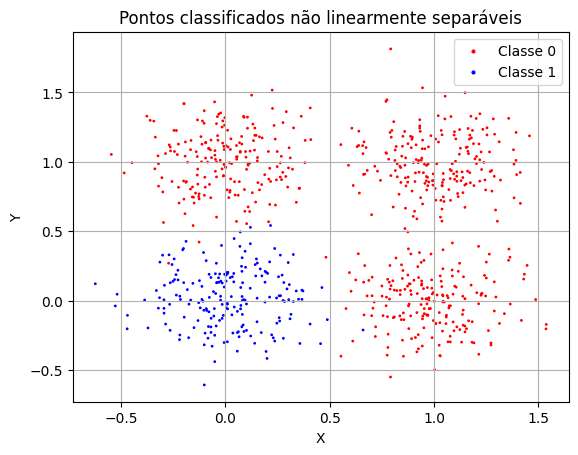

In [30]:
classe_0 = dataHoldout[dataHoldout[:, 2] == 0][:, :2]
classe_1 = dataHoldout[dataHoldout[:, 2] == 1][:, :2]

cores = np.where(dataHoldout[:,2] == 0, 'red', 'blue')

plt.scatter(dataHoldout[:, 0], dataHoldout[:, 1], c=cores, s=1)

legenda = [
       Line2D([0], [0], marker='o', color='w', label='Classe 0',
           markerfacecolor='red', markersize=4),
       Line2D([0], [0], marker='o', color='w', label='Classe 1',
           markerfacecolor='blue', markersize=4)
]
plt.legend(handles=legenda)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Pontos classificados não linearmente separáveis")
plt.grid(True)
plt.show()

A posição dos pontos no gráfico evidencia que este problema não é linearmente separável.

## Adicionando o viés ($x_0 = -1$)

Criando um array coluna que possui os valores de -1 no neuronio perceptron 

In [31]:
vies = -1 * np.ones((dataHoldout.shape[0], 1))
print(vies.shape)
print(type(vies))

(800, 1)
<class 'numpy.ndarray'>


In [32]:
dataHoldout = np.hstack((vies, dataHoldout))
print(dataHoldout)

[[-1.         -0.29322959 -0.09065359  1.        ]
 [-1.          0.07988839  0.21101297  1.        ]
 [-1.         -0.07825563 -0.08083512  1.        ]
 ...
 [-1.          0.65980493  1.05876739  0.        ]
 [-1.          1.09867123  0.87404891  0.        ]
 [-1.          0.72930655  0.93224271  0.        ]]


## Separando dados entre teste e treino

In [33]:
np.random.seed(0)

np.random.shuffle(dataHoldout)

aux = int(0.7 * len(dataHoldout))

treino = dataHoldout[:aux]
teste = dataHoldout[aux:]

print("Treino:", len(treino))
print("Teste:", len(teste))

Treino: 560
Teste: 240


## Inicialização

Instanciando o perceptron com os valores solicitados.

In [34]:
tamanho_input = treino.shape[1] - 1
neuronio3 = Perceptron((-0.5, 0.5), degrau, tamanho_input)

## Treinamento

In [35]:
ajustes, epocas = neuronio3.fit(treino, eta=0.1, max_epocas=100)

In [36]:
print(f"O treinamento terminou em {epocas} épocas e com {ajustes} ajustes nos pesos")

O treinamento terminou em 100 épocas e com 2791 ajustes nos pesos


In [37]:
print(neuronio3)

Perceptron de Rosenblatt
Número de ajustes: 2791
Pesos: w0 = -0.36396618257143054; w1 = -0.6620381684076257; w2 = -0.6926713465184829



In [38]:
w0, w1, w2 = neuronio3.get_pesos()

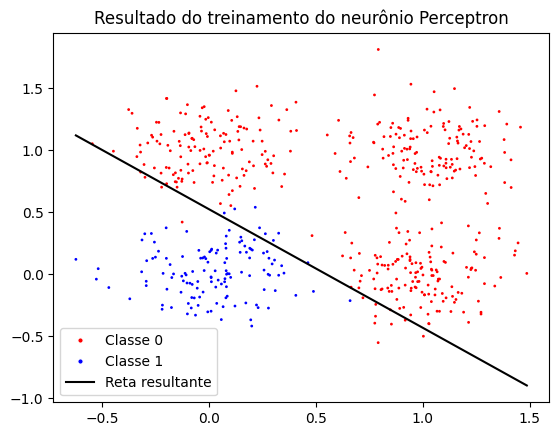

In [39]:
cores = np.where(treino[:, 3] == 0, 'red', 'blue')

plt.scatter(treino[:, 1], treino[:, 2], c=cores, s=1)

x = np.linspace(max(treino[:, 1]), min(treino[:, 1]), 100)
y = w0/w2 - x * w1/w2
plt.plot(x, y, c='k')

legenda = [
       Line2D([0], [0], marker='o', color='w', label='Classe 0',
           markerfacecolor='red', markersize=4),
       Line2D([0], [0], marker='o', color='w', label='Classe 1',
           markerfacecolor='blue', markersize=4),
       Line2D([], [], color='k', linestyle='-', label='Reta resultante')
]
plt.legend(handles=legenda)
plt.title("Resultado do treinamento do neurônio Perceptron")
plt.show()

## Testando

In [40]:
def predict(valores_teste, neuronio: Perceptron):
    previsoes = []
    for val in valores_teste:
        x_n = val[:3]
        y_chapeu = neuronio.forward(x_n)
        previsoes.append(y_chapeu)
    return (previsoes)

In [41]:
previsao = predict(teste, neuronio)
print(previsao)

[0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1]


## Matriz de confusão com casos de teste

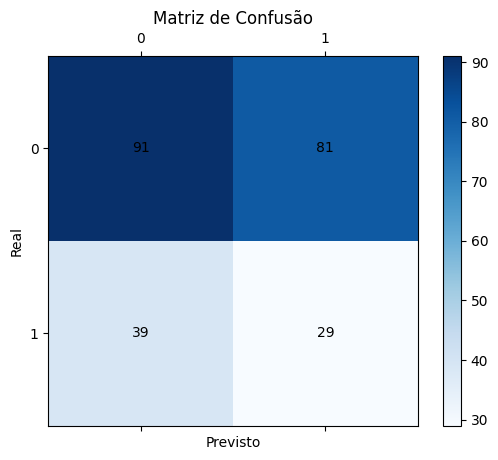

In [42]:
cm = confusion_matrix(teste[:, 3], previsao)

fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
fig.colorbar(cax)
ax.set_xlabel('Previsto')
ax.set_ylabel('Real')
for (i, j), valor in np.ndenumerate(cm):
    ax.text(j, i, f'{valor}', ha='center', va='center', color='black')

## Teste com conjunto de treino

In [43]:
previsao_treino = predict(treino, neuronio)
print(previsao_treino)

[0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 

## Acurácia do conjunto de Treino

In [44]:
acuracia = accuracy_score(treino[:, 3], previsao_treino)
print(f'Acurácia: {acuracia}')

Acurácia: 0.4785714285714286


## Precisão, revocação e f1 score do conjunto de Treino

In [45]:
precisao = precision_score(treino[:, 3], previsao_treino)
revocacao = recall_score(treino[:, 3], previsao_treino)
f1 = f1_score(treino[:, 3], previsao_treino)
print(f'Precisão: {precisao}')
print(f'Revocação: {revocacao}')
print(f'F1 Score: {f1}')

Precisão: 0.22972972972972974
Revocação: 0.5151515151515151
F1 Score: 0.3177570093457944


## Gráficos dos resultados dos testes com dados de treino e dados de teste

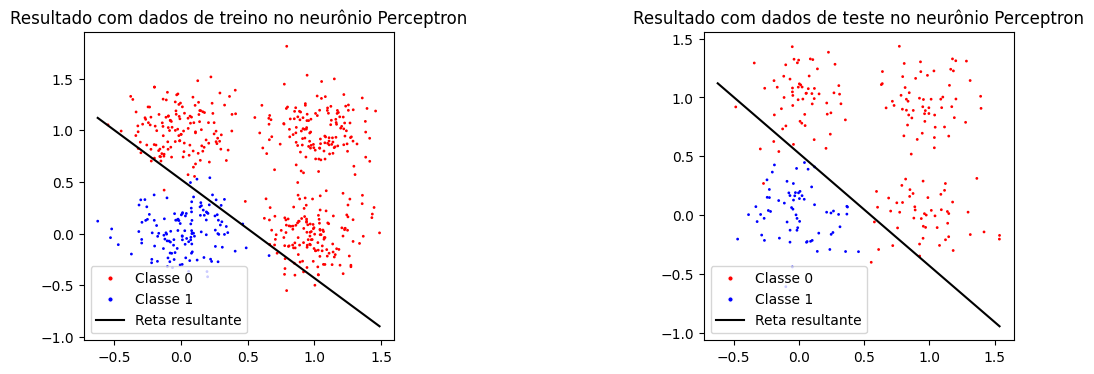

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))


plt.subplot(1, 2, 1)
cores = np.where(treino[:, 3] == 0, 'red', 'blue')

plt.scatter(treino[:, 1], treino[:, 2], c=cores, s=1)

x = np.linspace(max(treino[:, 1]), min(treino[:, 1]), 100)
y = w0/w2 - x * w1/w2
plt.plot(x, y, c='k')

legenda = [
       Line2D([0], [0], marker='o', color='w', label='Classe 0',
           markerfacecolor='red', markersize=4),
       Line2D([0], [0], marker='o', color='w', label='Classe 1',
           markerfacecolor='blue', markersize=4),
       Line2D([], [], color='k', linestyle='-', label='Reta resultante')
]
plt.legend(handles=legenda)
plt.title("Resultado com dados de treino no neurônio Perceptron")



plt.subplot(1, 2, 2)
cores = np.where(teste[:, 3] == 0, 'red', 'blue')

plt.scatter(teste[:, 1], teste[:, 2], c=cores, s=1)

x = np.linspace(max(teste[:, 1]), min(treino[:, 1]), 100)
y = w0/w2 - x * w1/w2
plt.plot(x, y, c='k')

legenda = [
       Line2D([0], [0], marker='o', color='w', label='Classe 0',
           markerfacecolor='red', markersize=4),
       Line2D([0], [0], marker='o', color='w', label='Classe 1',
           markerfacecolor='blue', markersize=4),
       Line2D([], [], color='k', linestyle='-', label='Reta resultante')
]
plt.legend(handles=legenda)
plt.title("Resultado com dados de teste no neurônio Perceptron")


plt.subplots_adjust(wspace=1)
plt.show()